## IMDB Reviews Datasets

## Import library

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

c:\Users\BACHLONG\anaconda3\envs\tensorflow-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [5]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

for s,k in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Preprocessing

In [6]:
vocab_size = 10000
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

## Plot Utility

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## Model 1: Flatten

In [10]:
embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 11526     
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_flatten = model_flatten.fit(padded, 
                            training_labels_final,
                            epochs=NUM_EPOCHS, 
                            batch_size=BATCH_SIZE, 
                            validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 2s 5ms/step - loss: 0.6245 - accuracy: 0.6388 - val_loss: 0.9523 - val_accuracy: 0.5250
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 0.3208 - accuracy: 0.8675 - val_loss: 1.5757 - val_accuracy: 0.4919
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 0.1927 - accuracy: 0.9328 - val_loss: 1.9221 - val_accuracy: 0.4984
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: 0.1004 - accuracy: 0.9762 - val_loss: 2.4249 - val_accuracy: 0.4994
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9953 - val_loss: 2.7432 - val_accuracy: 0.5000
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9992 - val_loss: 3.2592 - val_accuracy: 0.4999
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0092 - accuracy: 0.9998 - val_loss: 3.5065 - val_accuracy: 0.5000
Epoch 

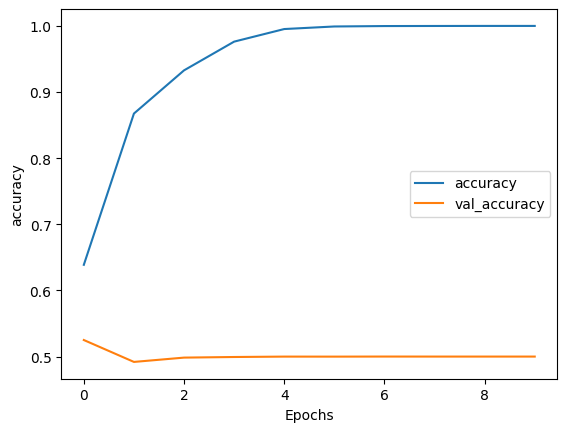

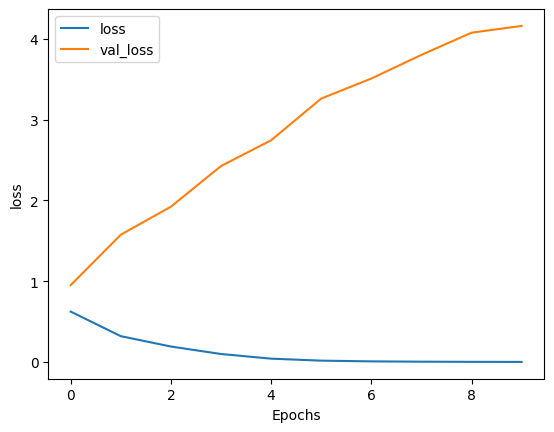

In [15]:
plot_graphs(history=history_flatten, string='accuracy')
plot_graphs(history=history_flatten, string='loss')

## Model 2: LSTM

In [18]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 6)                 390       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded,
                              training_labels_final,
                              batch_size=BATCH_SIZE,
                              epochs=NUM_EPOCHS,
                              validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 18s 75ms/step - loss: 0.5421 - accuracy: 0.7042 - val_loss: 1.0976 - val_accuracy: 0.5004
Epoch 2/10
196/196 [==============================] - 16s 83ms/step - loss: 0.3237 - accuracy: 0.8692 - val_loss: 1.2002 - val_accuracy: 0.5484
Epoch 3/10
196/196 [==============================] - 16s 81ms/step - loss: 0.2598 - accuracy: 0.9027 - val_loss: 1.5512 - val_accuracy: 0.4976
Epoch 4/10
196/196 [==============================] - 16s 81ms/step - loss: 0.2170 - accuracy: 0.9213 - val_loss: 1.7923 - val_accuracy: 0.4897
Epoch 5/10
196/196 [==============================] - 16s 81ms/step - loss: 0.1899 - accuracy: 0.9354 - val_loss: 1.6295 - val_accuracy: 0.5115
Epoch 6/10
196/196 [==============================] - 17s 85ms/step - loss: 0.1696 - accuracy: 0.9428 - val_loss: 1.7003 - val_accuracy: 0.5036
Epoch 7/10
196/196 [==============================] - 17s 88ms/step - loss: 0.1538 - accuracy: 0.9494 - val_loss: 2.0842 - val_accuracy:

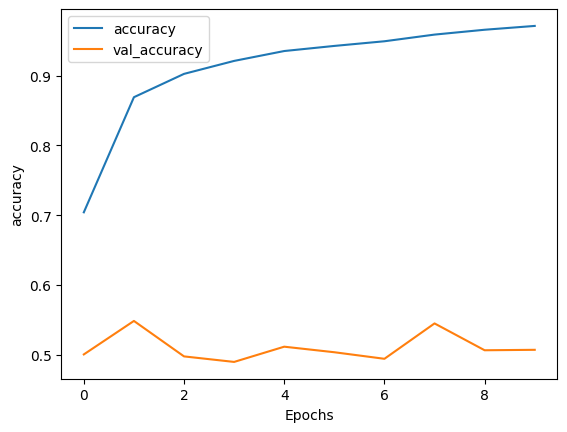

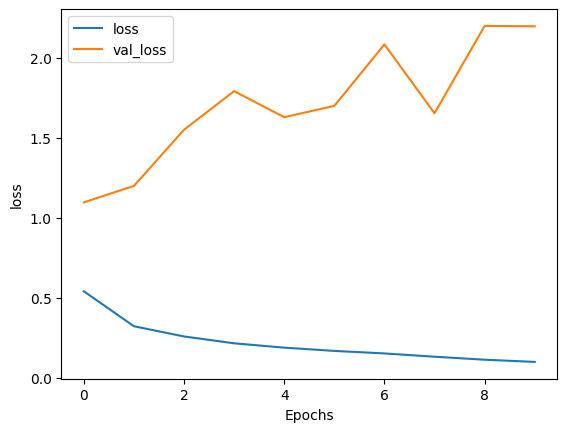

In [22]:
plot_graphs(history=history_lstm, string = 'accuracy')
plot_graphs(history=history_lstm, string = 'loss')

## Model 3: GRU

In [23]:
embedding_dim = 16
gru_dim = 32
dense_dim = 6

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 6)                 390       
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_gru = model_gru.fit(padded,
                            training_labels_final,
                            batch_size=BATCH_SIZE,
                            epochs=NUM_EPOCHS,
                            validation_data=(testing_padded, testing_labels_final))


Epoch 1/10
196/196 [==============================] - 16s 59ms/step - loss: 0.5970 - accuracy: 0.6482 - val_loss: 1.2426 - val_accuracy: 0.4682
Epoch 2/10
196/196 [==============================] - 19s 95ms/step - loss: 0.3246 - accuracy: 0.8635 - val_loss: 1.2476 - val_accuracy: 0.5434
Epoch 3/10
196/196 [==============================] - 18s 92ms/step - loss: 0.2510 - accuracy: 0.9031 - val_loss: 1.4033 - val_accuracy: 0.5032
Epoch 4/10
196/196 [==============================] - 14s 73ms/step - loss: 0.2028 - accuracy: 0.9276 - val_loss: 1.3040 - val_accuracy: 0.5388
Epoch 5/10
196/196 [==============================] - 14s 73ms/step - loss: 0.1693 - accuracy: 0.9396 - val_loss: 1.8532 - val_accuracy: 0.4792
Epoch 6/10
196/196 [==============================] - 14s 73ms/step - loss: 0.1418 - accuracy: 0.9506 - val_loss: 2.2179 - val_accuracy: 0.5016
Epoch 7/10
196/196 [==============================] - 14s 73ms/step - loss: 0.1157 - accuracy: 0.9624 - val_loss: 2.3897 - val_accuracy:

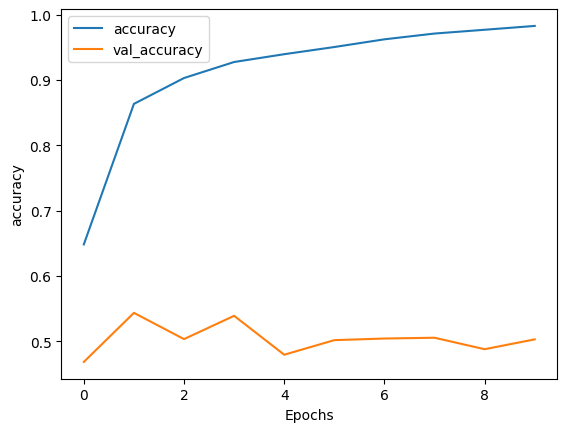

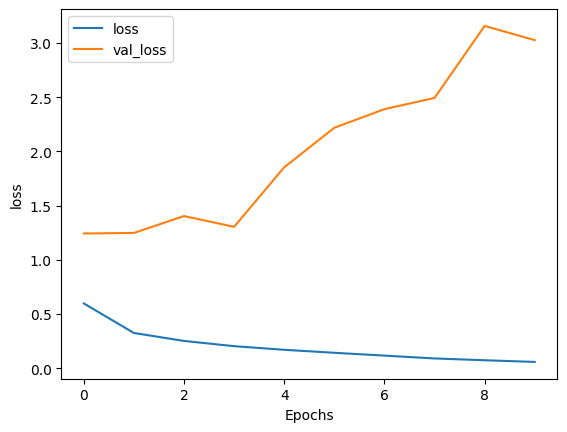

In [28]:
plot_graphs(history=history_gru, string='accuracy')
plot_graphs(history=history_gru, string='loss')

## Model 4: Convolutional 1D

In [30]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          160000    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         10368     
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_16 (Dense)            (None, 6)                 774       
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [31]:
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_conv = model_conv.fit(padded,
                              training_labels_final,
                              batch_size=BATCH_SIZE,
                              epochs=NUM_EPOCHS,
                              validation_data=[testing_padded, testing_labels_final])

Epoch 1/10
196/196 [==============================] - 4s 18ms/step - loss: 0.5346 - accuracy: 0.7340 - val_loss: 1.0621 - val_accuracy: 0.5156
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 0.2987 - accuracy: 0.8762 - val_loss: 1.0776 - val_accuracy: 0.5886
Epoch 3/10
196/196 [==============================] - 5s 25ms/step - loss: 0.2410 - accuracy: 0.9056 - val_loss: 1.7952 - val_accuracy: 0.4675
Epoch 4/10
196/196 [==============================] - 4s 23ms/step - loss: 0.2047 - accuracy: 0.9225 - val_loss: 1.6564 - val_accuracy: 0.5219
Epoch 5/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1798 - accuracy: 0.9357 - val_loss: 1.9298 - val_accuracy: 0.4929
Epoch 6/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1568 - accuracy: 0.9448 - val_loss: 2.2847 - val_accuracy: 0.4570
Epoch 7/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1401 - accuracy: 0.9509 - val_loss: 1.9857 - val_accuracy: 0.5022

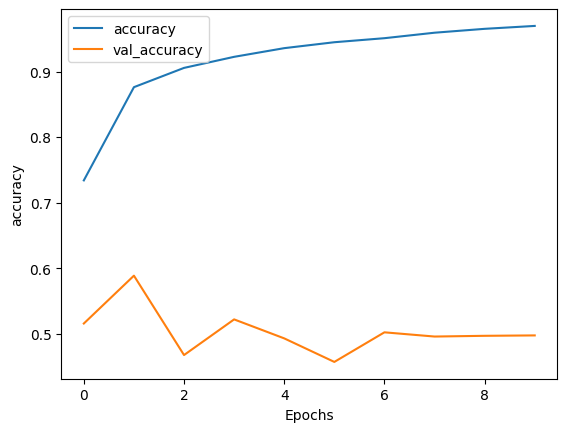

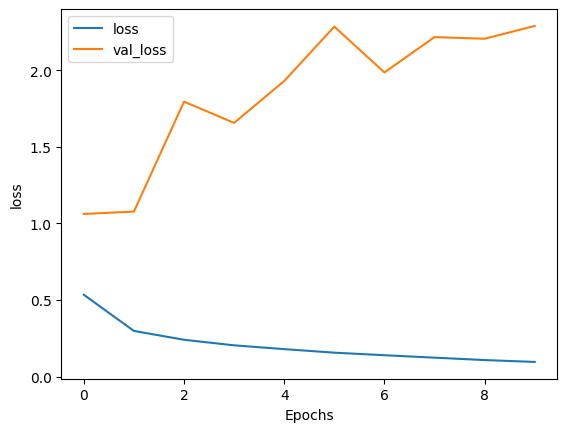

In [34]:
plot_graphs(history=history_conv, string='accuracy')
plot_graphs(history=history_conv, string='loss')